In [1]:
import numpy as np
import cv2
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
# read image 
img = cv2.imread('./images/ms_dhoni/3243.1512975565.jpg')
img.shape

(225, 240, 3)

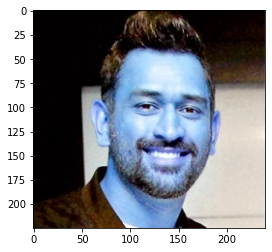

In [3]:
# display the image (RBG)
plt.imshow(img)

In [4]:
# gray scale image 
grayscale = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
grayscale.shape

(225, 240)

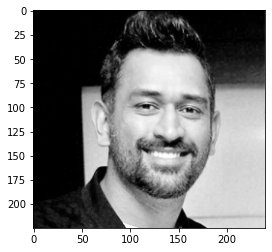

In [5]:
plt.imshow(grayscale, cmap='gray')

In [6]:
# face and eyes detection
# face_cascade xml loaded from opencv folder 
face_cascade = cv2.CascadeClassifier('./opencv/haarcascade_frontalface.xml')
eye_cascade = cv2.CascadeClassifier('./opencv/haarcascade_eye.xml')

faces = face_cascade.detectMultiScale(grayscale, 1.3, 5)
faces # retun an array [x,y,width, height]

array([[ 64,  44, 145, 145]], dtype=int32)

In [7]:
# storing the first value i.e face detection array
(x,y,w,h) = faces[0]
x,y,w,h

(64, 44, 145, 145)

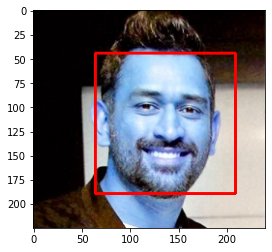

In [8]:
face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
plt.imshow(face_img)

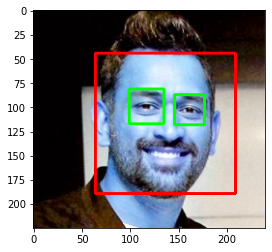

In [9]:
# eye detection
cv2.destroyAllWindows()
for (x,y,w,h) in faces:
    face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = grayscale[y:y+h, x:x+w]
    roi_color = face_img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)
        

plt.figure()
plt.imshow(face_img, cmap='gray')
plt.show()

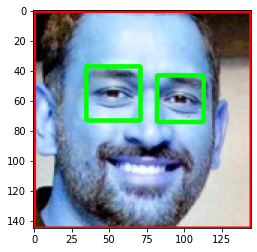

In [10]:
# image crop 
plt.imshow(roi_color, cmap='gray')

In [11]:
def get_cropped_image_if_2_eyes(image_path):
    img = cv2.imread(image_path)
    if img is not None:
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        faces = face_cascade.detectMultiScale(gray, 1.3, 5)
        for (x,y,w,h) in faces:
            roi_gray = gray[y:y+h, x:x+w]
            roi_color = img[y:y+h, x:x+w]
            eyes = eye_cascade.detectMultiScale(roi_gray)
            if len(eyes) >= 2:
                return roi_color
        else: 
            return 

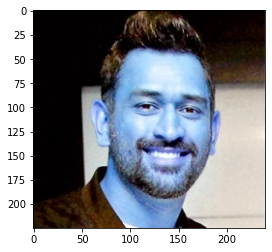

In [12]:
original_image = cv2.imread('./images/ms_dhoni/3243.1512975565.jpg')
plt.imshow(original_image)

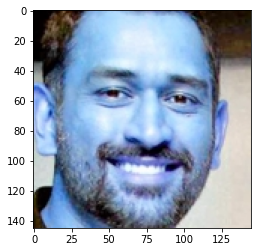

In [13]:
cropped_image = get_cropped_image_if_2_eyes('./images/ms_dhoni/3243.1512975565.jpg')
plt.imshow(cropped_image)

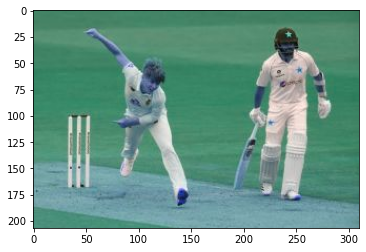

In [14]:
org_image_obstructed = cv2.imread('./images/ms_dhoni/46.jpg')
plt.imshow(org_image_obstructed)

In [15]:
cropped_image_no_2_eyes = get_cropped_image_if_2_eyes('./images/ms_dhoni/46.jpg')
cropped_image_no_2_eyes
# no output as two eyes clearly not detected. 

In [16]:
# define the path of images and cropped images
path_to_data = "./images/"
path_to_cr_data = "./cropped_images/"

In [17]:
# to get all the directories under images
import os
img_dirs = []
for entry in os.scandir(path_to_data):
    if entry.is_dir():
        img_dirs.append(entry.path)

In [18]:
img_dirs 

['./images/rohit_sharma',
 './images/ishant_sharma',
 './images/ms_dhoni',
 './images/virat_kholi',
 './images/hardik_pandya']

In [19]:
# delete a folder cropped_images if it already exits else create new folder
import shutil
if os.path.exists(path_to_cr_data):
     shutil.rmtree(path_to_cr_data)
os.mkdir(path_to_cr_data)

In [20]:
cropped_image_dirs = []
cricketer_file_names_dict = {}

for img_dir in img_dirs:
    count = 1
    # spliting by '/' and -1 returns last item on the list , which is our folder name of images
    cricketer_name = img_dir.split('/')[-1]
    print(cricketer_name)
    
    cricketer_file_names_dict[cricketer_name] = []
    
    for entry in os.scandir(img_dir):
        # crop images with eyes
        roi_color = get_cropped_image_if_2_eyes(entry.path)
        print(entry.path)
        # if crop image is not none then proceed else it return none 
        if roi_color is not None:
            # create the path of the folder
            cropped_folder = path_to_cr_data + cricketer_name
            # if the folder doesnot exists then create a folder
            if not os.path.exists(cropped_folder):
                os.makedirs(cropped_folder)
                cropped_image_dirs.append(cropped_folder)
                print("Generating cropped images in folder: ",cropped_folder)

            # save image
            cropped_file_name = cricketer_name + str(count) + ".png"
            print("Image created: ",cropped_file_name)
            cropped_file_path = cropped_folder + "/" + cropped_file_name 
            print("File path: ",cropped_file_path)
            print("-------------------------")
            
            cv2.imwrite(cropped_file_path, roi_color)
            cricketer_file_names_dict[cricketer_name].append(cropped_file_path)
            count += 1

rohit_sharma
./images/rohit_sharma/3516.1512975697.jpg
Generating cropped images in folder:  ./cropped_images/rohit_sharma
Image created:  rohit_sharma1.png
File path:  ./cropped_images/rohit_sharma/rohit_sharma1.png
-------------------------
./images/rohit_sharma/47.jpg
ishant_sharma
./images/ishant_sharma/3515.1512975487.jpg
Generating cropped images in folder:  ./cropped_images/ishant_sharma
Image created:  ishant_sharma1.png
File path:  ./cropped_images/ishant_sharma/ishant_sharma1.png
-------------------------
./images/ishant_sharma/.DS_Store
./images/ishant_sharma/43.jpg
ms_dhoni
./images/ms_dhoni/3243.1512975565.jpg
Generating cropped images in folder:  ./cropped_images/ms_dhoni
Image created:  ms_dhoni1.png
File path:  ./cropped_images/ms_dhoni/ms_dhoni1.png
-------------------------
./images/ms_dhoni/46.jpg
virat_kholi
./images/virat_kholi/48.jpg
./images/virat_kholi/3788.1512975841.jpg
Generating cropped images in folder:  ./cropped_images/virat_kholi
Image created:  virat_kh

In [21]:
import pywt  

#wavelet transform
def w2d(cropped_img, mode='haar', level=1):
    imArray = cropped_img
    #Datatype conversions
    #convert to grayscale
    imArray = cv2.cvtColor( imArray,cv2.COLOR_RGB2GRAY )
    #convert to float
    imArray =  np.float32(imArray)   
    imArray /= 255;
    # compute coefficients 
    coeffs=pywt.wavedec2(imArray, mode, level=level)

    #Process Coefficients
    coeffs_H=list(coeffs)  
    coeffs_H[0] *= 0;  

    # reconstruction
    imArray_H=pywt.waverec2(coeffs_H, mode);
    imArray_H *= 255;
    imArray_H =  np.uint8(imArray_H)

    return imArray_H

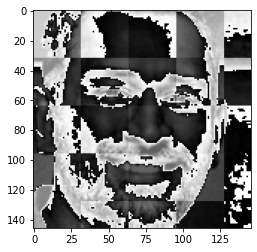

In [24]:
im_har = w2d(cropped_image,'db1',5)
plt.imshow(im_har, cmap='gray')

In [26]:
cricketer_file_names_dict.items()

dict_items([('rohit_sharma', ['./cropped_images/rohit_sharma/rohit_sharma1.png']), ('ishant_sharma', ['./cropped_images/ishant_sharma/ishant_sharma1.png']), ('ms_dhoni', ['./cropped_images/ms_dhoni/ms_dhoni1.png']), ('virat_kholi', ['./cropped_images/virat_kholi/virat_kholi1.png']), ('hardik_pandya', ['./cropped_images/hardik_pandya/hardik_pandya1.png', './cropped_images/hardik_pandya/hardik_pandya2.png'])])

In [33]:
class_dict = {}
count = 0
for cricketer_name in cricketer_file_names_dict.keys():
    class_dict[cricketer_name] = count
    count = count + 1
class_dict

{'rohit_sharma': 0,
 'ishant_sharma': 1,
 'ms_dhoni': 2,
 'virat_kholi': 3,
 'hardik_pandya': 4}

In [34]:
X, Y = [], []
for cricketer_name, training_files in cricketer_file_names_dict.items():
    for training_image in training_files:
        img = cv2.imread(training_image)
        scalled_raw_img = cv2.resize(img, (32, 32))
        img_har = w2d(img,'db1',5)
        scalled_img_har = cv2.resize(img_har, (32, 32))
        # 32*32 is x and y and 3 is RGB
        combined_img = np.vstack((scalled_raw_img.reshape(32*32*3,1),scalled_img_har.reshape(32*32,1)))
        X.append(combined_img)
        Y.append(class_dict[cricketer_name])

In [36]:
# numbers of pixel
X[1]

array([[ 23],
       [ 23],
       [ 23],
       ...,
       [205],
       [208],
       [209]], dtype=uint8)

In [37]:
X = np.array(X).reshape(len(X),4096).astype(float)
X.shape

(6, 4096)